# Import Libraries

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load train and test data

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/Child-Mind-Data/train.csv')
#test_data = pd.read_csv('/content/drive/MyDrive/Child-Mind-Data/test.csv')


print(train_data.shape)
#print(test_data.shape)

#test_data.head()
#print(train_data)

(3960, 82)


# Find categorical columns

In [4]:
categorical_columns = train_data.select_dtypes(include=['object', 'string', 'bool']).columns.tolist()
non_categorical_columns = train_data.select_dtypes(exclude=['object', 'string', 'bool']).columns.tolist()


categorical_columns_dataset = train_data[categorical_columns]
non_categorical_columns_dataset = train_data[non_categorical_columns]


print(categorical_columns)
print(non_categorical_columns)

#print(categorical_columns_dataset.shape)
#print(non_categorical_columns_dataset.shape)

['id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season', 'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season']
['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_

In [5]:
#non_categorical_columns_dataset.describe()

In [6]:
# Step 3: Plotting non-categorical features
# Histogram for each feature
#for column in non_categorical_columns_dataset.columns:
#    plt.figure(figsize=(6, 4))
#    sns.histplot(non_categorical_columns_dataset[column], kde=True)
#    plt.title(f'Distribution of {column}')
#    plt.xlabel(column)
#    plt.ylabel('Frequency')
#    plt.show()

In [7]:
# Step 4: Pairplot to analyze relationships
#sns.pairplot(non_categorical_columns_dataset)
#plt.suptitle('Pairplot of Non-Categorical Features', y=1.02)
#plt.show()

# Find Missing Data ratio in Target column

In [8]:
num_of_nans = 0
total_sii_s = train_data['sii'].count()


for item in train_data['sii']:
  if math.isnan(item):
    num_of_nans += 1


print((num_of_nans/total_sii_s) * 100)
#print(nan_indices)

#print(nan_rows)
#print(type(non_categorical_columns_dataset))

train_data_cleaned = train_data.dropna(subset=['sii'])
#test_data_cleaned = test_data.dropna(subset=['sii'])

print(train_data.shape)
print(train_data_cleaned.shape)

train_data_loss = ((train_data.shape[0] - train_data_cleaned.shape[0])/train_data.shape[0]) * 100
#test_data_loss = ((test_data.shape[0] - test_data_cleaned.shape[0])/test_data.shape[0]) * 100

print(train_data_loss)
#print(test_data_loss)


44.73684210526316
(3960, 82)
(2736, 82)
30.909090909090907


# Encode Categorical Data

In [9]:
# label encode each categorical column
le = LabelEncoder()
for item in categorical_columns:
  if item != 'id':
    train_data_cleaned[item] = le.fit_transform(train_data_cleaned[item])
    #print(train_data_cleaned[item].value_counts())
    #print(train_data[item].value_counts())

#train_data_cleaned_unfiltered = train_data_cleaned

#train_data_cleaned = train_data_cleaned.loc[:, ~train_data_cleaned.columns.str.startswith('PCIAT')]

#print(train_data_cleaned.head())


<ipython-input-9-33d8cdd7f486>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned[item] = le.fit_transform(train_data_cleaned[item])
<ipython-input-9-33d8cdd7f486>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned[item] = le.fit_transform(train_data_cleaned[item])
<ipython-input-9-33d8cdd7f486>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

# Correlation Matrix

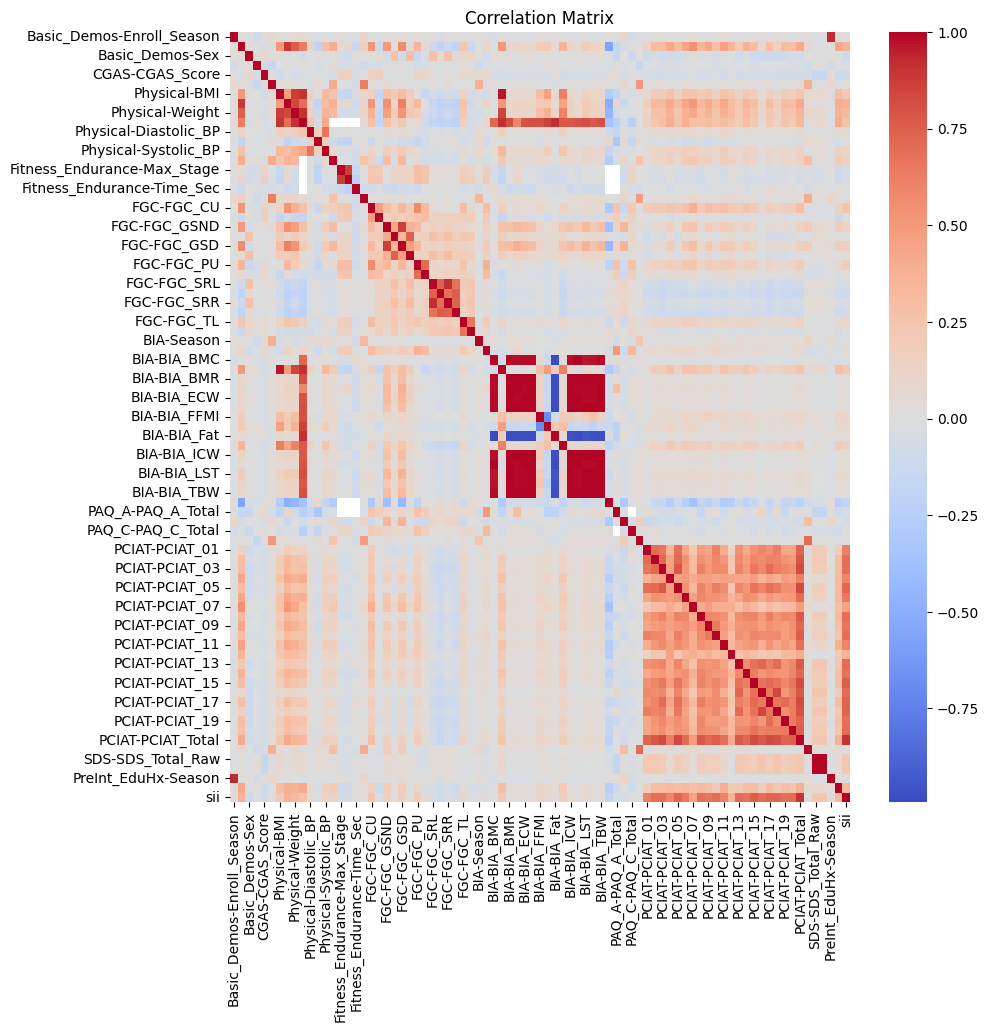

In [10]:
correlation_matrix = train_data_cleaned.iloc[:, 1:].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Remove features not in test dataset

In [11]:
train_data_cleaned_unfiltered = train_data_cleaned

train_data_cleaned = train_data_cleaned.loc[:, ~train_data_cleaned.columns.str.startswith('PCIAT')]

print(train_data_cleaned.head())

         id  Basic_Demos-Enroll_Season  ...  PreInt_EduHx-computerinternet_hoursday  sii
0  00008ff9                          0  ...                                     3.0  2.0
1  000fd460                          2  ...                                     0.0  0.0
2  00105258                          2  ...                                     2.0  0.0
3  00115b9f                          3  ...                                     0.0  1.0
5  001f3379                          1  ...                                     0.0  1.0

[5 rows x 60 columns]


# Split X and Y

In [12]:
X = train_data_cleaned.iloc[:, :-1]
y = train_data_cleaned.iloc[:, -1]

# Split Test from Train

In [13]:
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X, y, test_size=0.25, random_state=1)

print(type(X_train_data))
print(type(X_test_data))
print(type(y_train_data))
print(type(y_test_data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


# Handle missing non categorical data

In [14]:
non_categorical_columns = [item for item in non_categorical_columns if not item.startswith('PCIAT')]

non_categorical_X_train_data = X_train_data[non_categorical_columns[:-1]]
non_categorical_X_test_data = X_test_data[non_categorical_columns[:-1]]

#print(non_categorical_X_test_data)

#X_imputer = SimpleImputer( missing_values = np.NaN,strategy='mean')

X_imputer = KNNImputer(n_neighbors=5)

X_imputer.fit(non_categorical_X_train_data)

imputed_data = X_imputer.transform(non_categorical_X_train_data)
X_train_data[non_categorical_columns[:-1]] = imputed_data

imputed_data = X_imputer.transform(non_categorical_X_test_data)
X_test_data[non_categorical_columns[:-1]] = imputed_data

#print(X_train_data.head())
#print(X_test_data.head())

print(type(X_train_data))
print(type(X_test_data))

print(y_train_data.isna().sum())
Y_imputer = SimpleImputer( missing_values = np.NaN,strategy='mean')

Y_imputer.fit(y_train_data.values.reshape(-1, 1))

imputed_data = Y_imputer.transform(y_train_data.values.reshape(-1, 1))

y_train_data = pd.Series(imputed_data.flatten())



imputed_data = Y_imputer.transform(y_test_data.values.reshape(-1, 1))

y_test_data = pd.Series(imputed_data.flatten())

print(type(y_train_data))
print(type(y_test_data))
#print(y_train_data.head())
#print(y_test_data.head())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
0
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


# Checking if all missing data is gone

In [15]:
missing_data_count_accumulator = 0

missing_count_per_column = X_train_data.isna().sum()
missing_data_count_accumulator += missing_count_per_column.sum()
missing_count_per_column = X_train_data.isnull().sum()
missing_data_count_accumulator += missing_count_per_column.sum()

missing_count_per_column = X_test_data.isna().sum()
missing_data_count_accumulator += missing_count_per_column.sum()
missing_count_per_column = X_test_data.isnull().sum()
missing_data_count_accumulator += missing_count_per_column.sum()

missing_count_per_column = y_train_data.isna().sum()
missing_data_count_accumulator += missing_count_per_column.sum()
missing_count_per_column = y_train_data.isnull().sum()
missing_data_count_accumulator += missing_count_per_column.sum()

missing_count_per_column = y_test_data.isna().sum()
missing_data_count_accumulator += missing_count_per_column.sum()
missing_count_per_column = y_test_data.isnull().sum()
missing_data_count_accumulator += missing_count_per_column.sum()

print("Missing data count:")
print(missing_data_count_accumulator)

Missing data count:
0


# Feature Scaling

In [16]:
print(X_train_data.head())
#print(X_test_data.head())

non_categorical_X_train_data = X_train_data[non_categorical_columns[:-1]]
non_categorical_X_test_data = X_test_data[non_categorical_columns[:-1]]

standard_scaler = StandardScaler()
non_categorical_X_train_data = standard_scaler.fit_transform(non_categorical_X_train_data)
non_categorical_X_test_data = standard_scaler.transform(non_categorical_X_test_data)

X_train_data[non_categorical_columns[:-1]] = non_categorical_X_train_data
X_test_data[non_categorical_columns[:-1]] = non_categorical_X_test_data

print(X_train_data)
#print(X_test_data.head())

            id  ...  PreInt_EduHx-computerinternet_hoursday
3753  f1baabc1  ...                                     0.0
1093  42c6f67a  ...                                     0.0
3644  eb749e46  ...                                     0.0
3832  f6d6f400  ...                                     0.0
3957  ffcd4dbd  ...                                     0.0

[5 rows x 59 columns]
            id  ...  PreInt_EduHx-computerinternet_hoursday
3753  f1baabc1  ...                               -0.965887
1093  42c6f67a  ...                               -0.965887
3644  eb749e46  ...                               -0.965887
3832  f6d6f400  ...                               -0.965887
3957  ffcd4dbd  ...                               -0.965887
...        ...  ...                                     ...
1399  571907fc  ...                               -0.965887
1313  5198e7b3  ...                                0.884030
1587  63fc9770  ...                               -0.040929
334   13cdb63a  .

# Data Visualization

In [17]:
# Step 3: Plotting non-categorical features
# Histogram for each feature
#for column in non_categorical_columns[:-20]:
#    plt.figure(figsize=(6, 4))
#    sns.histplot(X_train_data[column], kde=True)
#    plt.title(f'Distribution of {column}')
#    plt.xlabel(column)
#    plt.ylabel('Frequency')
#    plt.show()

# Model 1: Multinomial Logistic Regressiom

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression(
    penalty='l2',           # L2 regularization
    solver='lbfgs',         # Solver suitable for multinomial logistic regression
    multi_class='multinomial', # Specify multinomial regression
    max_iter=5000,           # Maximum number of iterations
    random_state=42,         # For reproducibility
    class_weight='balanced'  # Adjust class weights for imbalanced data
)

print(y_test_data.value_counts())

target_labels = ['none', 'mild', 'moderate', 'severe']

X_train_data_model = X_train_data.to_numpy()
y_train_data_model = y_train_data.to_numpy()

X_test_data_model = X_test_data.to_numpy()
y_test_data_model = y_test_data.to_numpy()

# Train the model
model.fit(X_train_data_model[:, 1:], y_train_data_model)

# Make predictions
y_pred = model.predict(X_test_data_model[:, 1:])

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test_data, y_pred, target_names = target_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_test_data_model, y_pred))

print(balanced_accuracy_score(y_test_data_model, y_pred))

# Example of predicting probabilities for each class
#print("y_test_data_model:")
#print(y_test_data_model)
#print("y_pred:")
#print(y_pred)
proba = model.predict_proba(X_test_data_model[:5, 1:])
print("\nPredicted probabilities for the first 5 test samples:")
print(proba)

0.0    405
1.0    185
2.0     86
3.0      8
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        none       0.79      0.63      0.70       405
        mild       0.33      0.29      0.31       185
    moderate       0.20      0.30      0.24        86
      severe       0.07      0.62      0.13         8

    accuracy                           0.50       684
   macro avg       0.35      0.46      0.35       684
weighted avg       0.58      0.50      0.53       684

Confusion Matrix:
[[257  85  43  20]
 [ 53  54  57  21]
 [ 15  24  26  21]
 [  0   1   2   5]]
0.4634463436304521

Predicted probabilities for the first 5 test samples:
[[2.20771124e-03 1.01802811e-02 9.04746721e-03 9.78564540e-01]
 [4.77228964e-01 3.43574492e-01 1.76647575e-01 2.54896925e-03]
 [1.38703113e-01 4.18843250e-01 4.36956038e-01 5.49759824e-03]
 [6.55977766e-01 2.32955033e-01 1.11056721e-01 1.04791319e-05]
 [5.45936781e-01 3.24597429e-01 1.09983075e-01 1.94827150e-02]]
